# Studying the patterns that determine the success of games

## Data overview

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import levene

In [2]:
# reading csv file and assigning the result to variable
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# displaying the head of the DataFrame
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


- Column names and data (columns name, platform, genre, rating) use lowercase and uppercase letters.

In [4]:
# displaying information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Gaps in columns name, year_of_release, genre, critic_score, user_score, rating;
- Change the year_of_release data type to integer;
- Change the user_score data type to float64.

In [5]:
# checking for values in all columns 
for row in data:
    print(row)
    print(data[row].value_counts())
    print()

Name
Need for Speed: Most Wanted                       12
FIFA 14                                            9
LEGO Marvel Super Heroes                           9
Ratatouille                                        9
Madden NFL 07                                      9
The LEGO Movie Videogame                           8
Lego Batman 3: Beyond Gotham                       8
Monopoly                                           8
FIFA Soccer 13                                     8
LEGO Star Wars II: The Original Trilogy            8
Madden NFL 08                                      8
LEGO Jurassic World                                8
Cars                                               8
Angry Birds Star Wars                              8
LEGO Harry Potter: Years 5-7                       8
Terraria                                           8
LEGO The Hobbit                                    8
FIFA 15                                            8
NBA Jam                                  

- The 'tbd' abbreviation needs to be processed in the user_score column.

In [6]:
# computing a summary of statistics
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
# checking for duplicates
data.duplicated().sum()

0

There are no duplicates.

**Conclusion**

- Column names and data (columns name, platform, genre, rating) use lowercase and uppercase letters;
- Gaps in the columns name, year_of_release, genre, critic_score, user_score, rating;
- Change the year_of_release data type to integer;
- Change the user_score data type to float64;
- The 'tbd' abbreviation needs to be processed in the user_score column.

## Data preprocessing

- Column names and data (columns name, platform, genre, rating) use lowercase and uppercase letters;
- Gaps in the columns name, year_of_release, genre, critic_score, user_score, rating;
- Change the year_of_release data type to integer;
- Change the user_score data type to float64;
- The 'tbd' abbreviation needs to be processed in the user_score column;
- Calculate total sales for all regions in a separate column.

**Lowercasing column names and data**

In [8]:
# lowercasing column names
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
# lowercasing data in the columns 'name', 'platform', 'genre', and 'rating'.
for column in data[['name','platform','genre','rating']]:
    data[column] = data[column].str.lower()    

**Processing gaps**

In [10]:
# checking gaps
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [11]:
# displaying gaps in the column 'name'
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- These gaps cannot be filled in. They probably will be removed.

In [12]:
# displaying gaps in the column 'year_of_release'
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,e
377,fifa soccer 2004,ps2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,e
456,lego batman: the videogame,wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,e10+
475,wwe smackdown vs. raw 2006,ps2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,x360,NaN,misc,1.93,0.33,0.00,0.21,92.0,8.2,t
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.00,0.07,73.0,tbd,e
678,lego indiana jones: the original adventures,wii,NaN,action,1.51,0.61,0.00,0.21,78.0,6.6,e10+
719,call of duty 3,wii,NaN,shooter,1.17,0.84,0.00,0.23,69.0,6.7,t
805,rock band,wii,NaN,misc,1.33,0.56,0.00,0.20,80.0,6.3,t


- Few gaps can be filled in with the year value from the name column. The rest probably will be removed.

In [13]:
# displaying gaps in the column 'genre'
data[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- These gaps cannot be filled in. They probably will be removed.

In [14]:
# displaying gaps in the column 'critic_score'
data[data['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,gb,1999.0,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,snes,1990.0,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,ds,2006.0,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,gb,1989.0,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,nes,1988.0,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


- These gaps cannot be filled in. They probably will be removed.

In [15]:
# displaying gaps in the column user_score
data[data['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,gb,1999.0,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,snes,1990.0,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,ds,2006.0,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,gb,1989.0,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,nes,1988.0,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


These gaps cannot be filled in. They probably will be removed.

In [16]:
# displaying gaps in the column 'rating'
data[data['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,gb,1999.0,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,snes,1990.0,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,ds,2006.0,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,gb,1989.0,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,nes,1988.0,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


- Gaps can be replaced with 'no rating'.

In [17]:
# creating a loop to replace gaps in the column 'year_of_release' with the year value from the column 'name'
for i in data[data['year_of_release'].isnull() == True].index:  
    data.loc[i, 'year_of_release'] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

In [18]:
# checking gaps in the column year_of_release
data['year_of_release'].isnull().sum()

146

- Gaps have decreased from 269 to 146.

In [19]:
# checking the percentage of missing values in the column 'name'
nulls_percentage_name = data['name'].isnull().sum() / len(data)
display('name: {:.2%}'.format(nulls_percentage_name))

# checking the percentage of missing values in the column 'year_of_release'
nulls_percentage_year_of_release = data['year_of_release'].isnull().sum() / len(data)
display('year_of_release: {:.2%}'.format(nulls_percentage_year_of_release))

# checking the percentage of missing values in the column 'genre'
nulls_percentage_genre = data['genre'].isnull().sum() / len(data)
display('genre: {:.2%}'.format(nulls_percentage_genre))

# checking the percentage of missing values in the column 'critic_score'
nulls_percentage_critic_score = data['critic_score'].isnull().sum() / len(data)
display('critic_score: {:.2%}'.format(nulls_percentage_critic_score))

# checking the percentage of missing values in the column 'user_score'
nulls_percentage_user_score = data['user_score'].isnull().sum() / len(data)
display('user_score: {:.2%}'.format(nulls_percentage_user_score))

# checking the percentage of missing values in the column 'rating'
nulls_percentage_rating = data['rating'].isnull().sum() / len(data)
display('rating: {:.2%}'.format(nulls_percentage_rating))

'name: 0.01%'

'year_of_release: 0.87%'

'genre: 0.01%'

'critic_score: 51.32%'

'user_score: 40.09%'

'rating: 40.48%'

- Gaps in the columns 'name', 'year_of_release', and 'genre' can be removed since they make up a small percentage of all data;
- Gaps in the column 'rating' can be filled in with 'no rating';
- There are too many gaps in the columns 'critic_score' and 'user_score', so removing them can distort the data analysis.

In [20]:
# calculating rows at the beginning of our analysis 
data_beginning_length = len(data)
data_beginning_length

16715

In [21]:
# dropping rows with gaps in the columns 'name' and 'year_of_release'
data.dropna(subset = ['name', 'year_of_release'], inplace = True)

In [22]:
# filling in gaps in the column 'rating'
data['rating'] = data['rating'].fillna('no rating')

In [23]:
# calculating rows after dropping/filling in gaps
data_final_length = len(data)
data_final_length

16567

In [24]:
# calculating the percentage of dropped rows
final_length = (data_beginning_length - data_final_length) / data_beginning_length * 100
round(final_length, 2)

0.89

0.89 percent of the data was deleted. It's good when no more than 10% of the data was deleted.

In [25]:
# checking for gaps
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating                0
dtype: int64

- We still have gaps in the columns 'critic_score' and 'user_score'.

**Changing data type**

In [26]:
# changing the column 'year_of_release' to int type
data['year_of_release'] = data['year_of_release'].astype(int)

**Processing the abbreviation 'tbd'**

'Tbd' means to be done or there is no rating yet. We can replace these values with Nan.

In [27]:
# replacing 'tbd' with Nan
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)

In [28]:
# changing the column 'user_score' to float type
data['user_score'] = data['user_score'].astype(float)

**Calculating total sales for all regions in a separate column**

In [29]:
# creating a new 'total_sales' column  with total sales across all regions
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

# displaying the head
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no rating,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,no rating,28.31


**Columns**

- Changed the column names to lowercase, as well as the data in the 'name', 'platform', 'genre', 'rating columns';
- Dropped gaps in the columns 'name', 'year_of_release', and 'genre'. 0.89 percent of the data was deleted;
- Filled in gaps in the column 'rating' with 'no rating';
- There are too many gaps in the columns 'critic_score' and 'user_score', so removing them can distort the data analysis;
- Changed the 'year_of_release' column to integer type;
- Changed the 'user_score' column to float64 type;
- Replaced the abbreviation 'tbd' in the 'user_score' column with 'no rating';
- Calculated total sales for all regions in a separate column.

## Exploratory data analysis

- Check how many games have been released over the years;
- Check how sales have changed across platforms;
- Select the relevant actual period to help build a forecast for 2017;
- Which platforms are leading in sales, rising or falling?
- Plot a box plot of global game sales by platform;
- Check how sales within one popular platform are impacted by user and critic scores;
- Check the distribution of sales by genre.

### Checking how many games have been released over the years

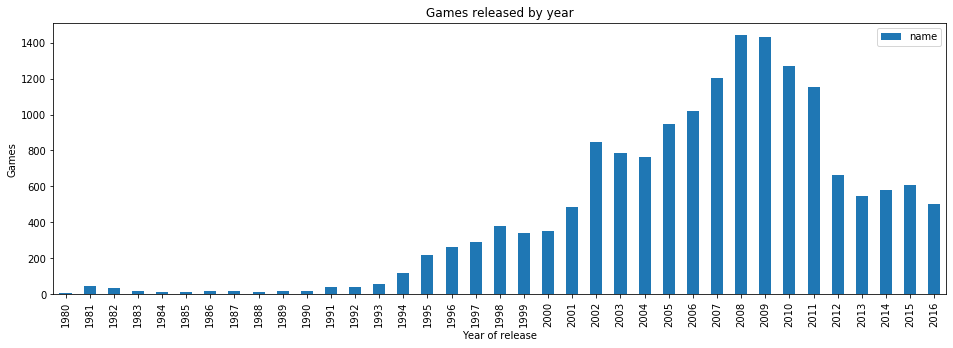

In [30]:
# calculating games released by year using pivot_table
game_per_year = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

# visualizing
game_per_year.plot(kind = 'bar', figsize=(16, 5))
plt.title('Games released by year')
plt.ylabel('Games')
plt.xlabel('Year of release')
plt.show()

- Between the mid-90s and 2008, the number of games released (for game consoles and computers) increased;
- Since 2008, mobile games have increased and the number of games released has declined;
- For exploratory analysis, it is important to use data from the last 3 years, since it reflects the latest trends in the gaming industry.

### Checking how sales have changed across platforms

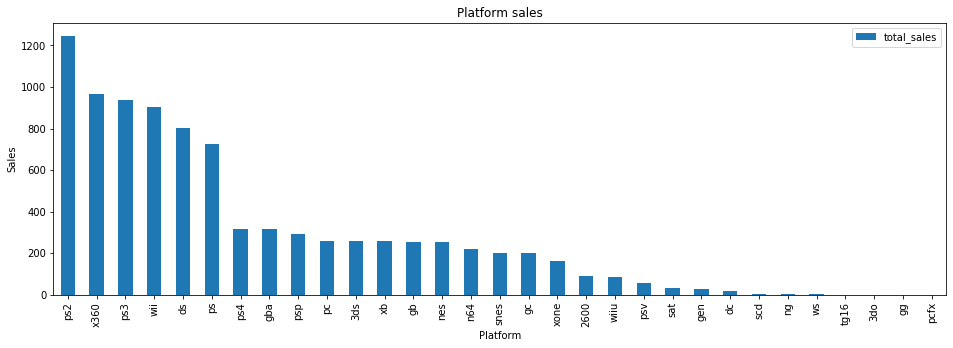

In [31]:
# creating a table with sales by platform
platform_sales = data.pivot_table(
    index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False)

# visualizing
platform_sales.plot(kind='bar', figsize=(16, 5))
plt.title('Platform sales')
plt.ylabel('Sales')
plt.xlabel('Platform')
plt.show()

In [32]:
# displaying the top 6 selling platforms
top6 = platform_sales.head(6).reset_index()
top6_dict = top6['platform'].unique()
top6_dict

array(['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps'], dtype=object)

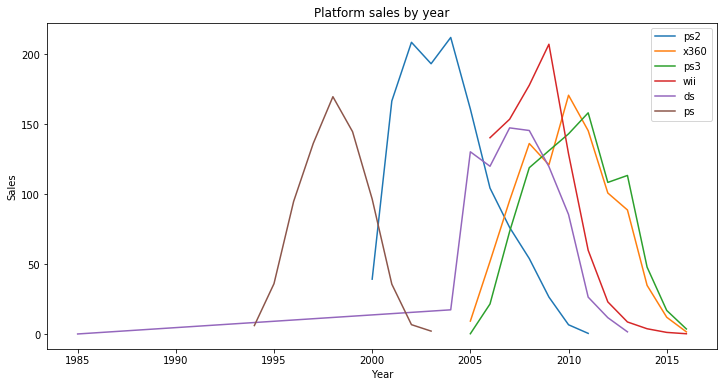

In [33]:
# visualizing sales of top-6 platforms by year
plt.figure(figsize=(12,6))
plt.title('Platform sales by year')
plt.ylabel('Sales')
plt.xlabel('Year')

for platform in top6_dict:
    top6_platforms = data[data['platform'] == platform].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    sns.lineplot(data=top6_platforms['total_sales'], label=platform)
    plt.legend()

- The best selling gaming platforms are ps2, x360, ps3, wii, ds, ps.
- Gaming platforms typically last 10 years and their peak sales fall 5 years after their release.

### Selecting the relevant actual period to help build a forecast for 2017

Considering how dynamic the industry of gaming platforms is, let's take the period of 2014-2016 as the actual period. 

In [34]:
# filtering data after 2013
actual_period = data.query('year_of_release > 2013')

### Which platforms are leading in sales, rising or falling?

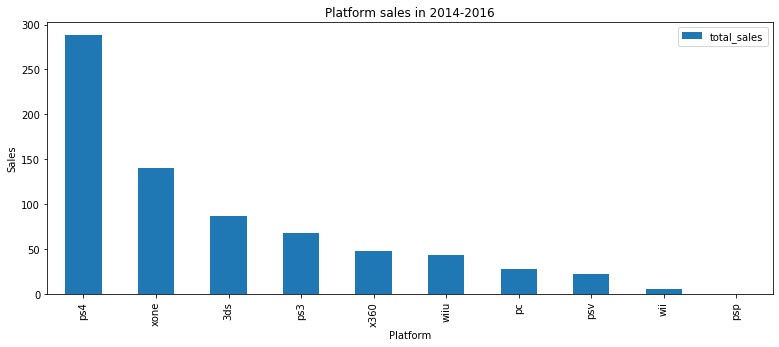

In [35]:
# filtering platform sales in 2014-2016
actual_period_sales = actual_period.pivot_table(
    index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False)

# visualizing
actual_period_sales.plot(kind='bar', figsize=(13, 5))
plt.title('Platform sales in 2014-2016')
plt.ylabel('Sales')
plt.xlabel('Platform')
plt.show()

Text(0.5, 0, 'Year')

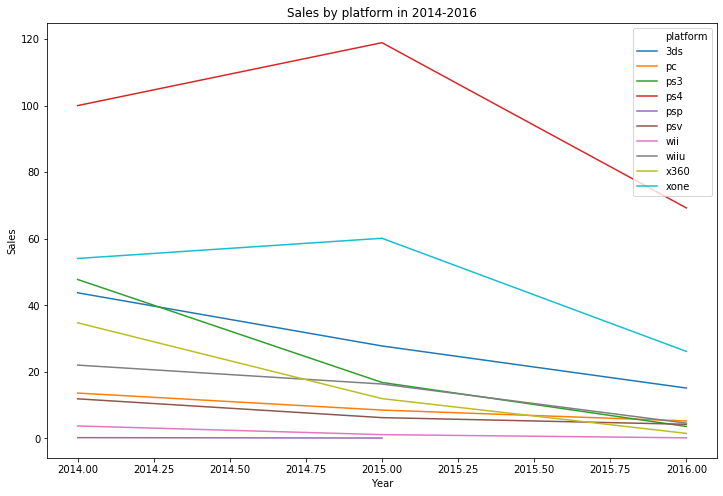

In [36]:
# analyzing the distribution of sales by platform in 2014-2016
actual_sales_by_year = actual_period.pivot_table(index = ['year_of_release', 'platform'], values = 'total_sales', aggfunc = 'sum').reset_index()

# visualizing
plt.figure(figsize=(12,8))
sns.lineplot(data = actual_sales_by_year, x = 'year_of_release', y = 'total_sales', hue = 'platform')
plt.title('Sales by platform in 2014-2016')
plt.ylabel('Sales')
plt.xlabel('Year')

- As of 2016, the PS4 remains the most popular platform, despite falling sales since 2015. It is followed by Xone, 3ds, PS3, X360;
- There is a slowdown in sales across all platforms;
- The data for 2016 has not yet been finalized.

### Plotting a box plot of global game sales by platform

In [37]:
# selecting top-5 selling platforms in 2014-2016
top5 = actual_period_sales.head(5).reset_index()
top5_dict = top5['platform'].unique()
top5_dict

array(['ps4', 'xone', '3ds', 'ps3', 'x360'], dtype=object)

Text(0, 0.5, 'Global sales')

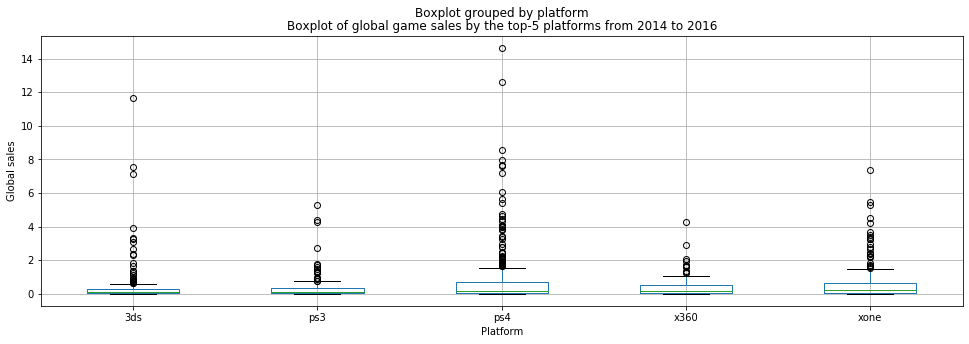

In [38]:
# plotting a boxplot of global game sales by the top 5 platforms from 2014 to 2016

# saving the top-5 platforms in the top_5_platforms variable
top_5_platforms = actual_period[actual_period['platform'].isin(top5_dict)]

# plotting a boxplot
top_5_platforms.boxplot(column = 'total_sales', by = ['platform'], figsize = (16, 5))
plt.title('Boxplot of global game sales by the top-5 platforms from 2014 to 2016')
plt.xlabel('Platform')
plt.ylabel('Global sales')

- PS4 scores span a wider range of scores, followed by 3DS, Xone, PS3, X360.

(0, 2)

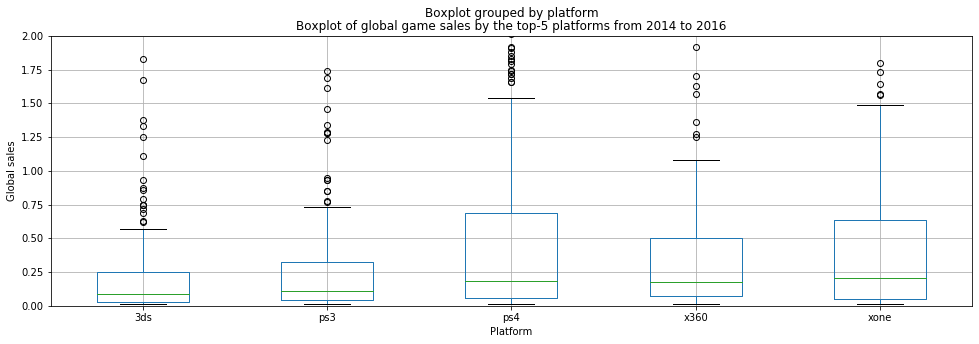

In [39]:
# plotting a boxplot of global game sales by the top 5 platforms from 2014 to 2016 in details
top_5_platforms.boxplot(column = 'total_sales', by = ['platform'], figsize = (16, 5))
plt.title('Boxplot of global game sales by the top-5 platforms from 2014 to 2016')
plt.xlabel('Platform')
plt.ylabel('Global sales')
plt.ylim((0, 2))  

- The distance between the upper and lower quartile is dominated by PS4, followed by Xone, X360, PS3, 3DS;
- The distance between the upper and lower whisker is dominated by PS4, followed by Xone, X360, PS3, 3DS;
- Median higher for Xone, then PS4, X360, PS3, 3DS.

Based on the chart, PS4 has more than half of sales, followed by Xone, X360, PS3, and 3DS.

### Checking how sales within one popular platform are impacted by user and critic scores

In [40]:
# correlation between users' scores and sales in 2014-2016
ps3_user_corr = actual_period[actual_period['platform'] == 'ps3']
ps3_user_corr['user_score'].corr(ps3_user_corr['total_sales'])

-0.16676141347662118

We observe a lack of correlation between users' scores and sales in 2014-2016

In [41]:
# correlation between critics' scores and sales in 2014-2016
ps3_critic_corr = actual_period[actual_period['platform'] == 'ps3']
ps3_critic_corr['critic_score'].corr(ps3_critic_corr['total_sales'])

0.44657460493190704

We observe a moderate correlation between critics' scores and sales in 2014-2016

Text(0, 0.5, 'Sales')

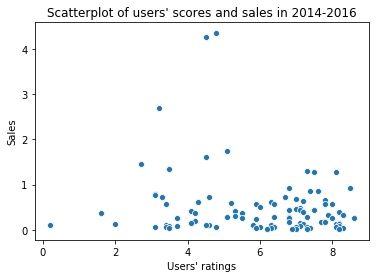

In [42]:
# plotting a scatterplot of users' scores and sales in 2014-2016
sns.scatterplot(x='user_score', y = 'total_sales', data = ps3_user_corr)
plt.title("Scatterplot of users' scores and sales in 2014-2016")
plt.xlabel("Users' ratings")
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

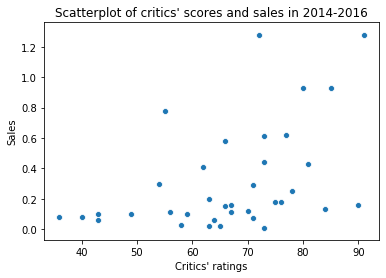

In [43]:
# plotting a scatterplot of critics' scores and sales in 2014-2016
sns.scatterplot(x='critic_score', y = 'total_sales', data = ps3_critic_corr)
plt.title("Scatterplot of critics' scores and sales in 2014-2016")
plt.xlabel("Critics' ratings")
plt.ylabel('Sales')

Let's compare with other platforms' game sales.

In [44]:
# creating a function that plots a scatterplot and calculates the correlation between the top-5 platforms in 2014-2016
def other_platforms(platform_name):
    platform = actual_period[actual_period['platform']==platform_name]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(platform_name, fontsize=14)
    ax[0].set(xlabel='User score')
    ax[0].set(ylabel='Total sales')
    ax[1].set(xlabel="Critics' score")
    ax[1].set(ylabel='Total sales')
    plt.show()
    
    user_corr = platform['user_score'].corr(platform['total_sales'])
    critic_corr = platform['critic_score'].corr(platform['total_sales'])
    
    print("Correlation between critics' scores and sales", platform_name, critic_corr)
    print("Correlation between users' scores and sales", platform_name, user_corr)

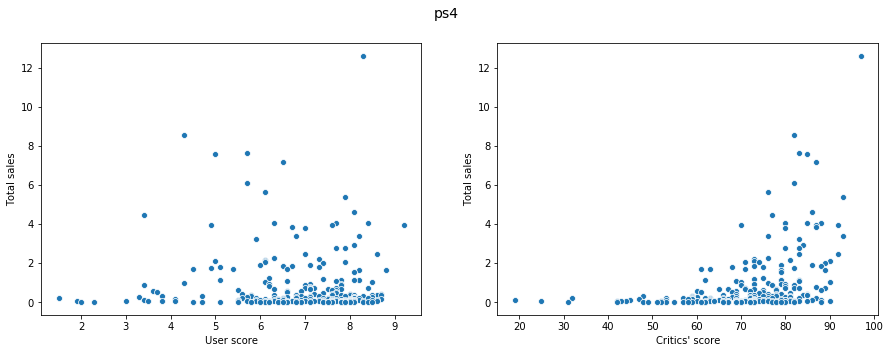

Correlation between critics' scores and sales ps4 0.40266141068104083
Correlation between users' scores and sales ps4 -0.040131589472697356


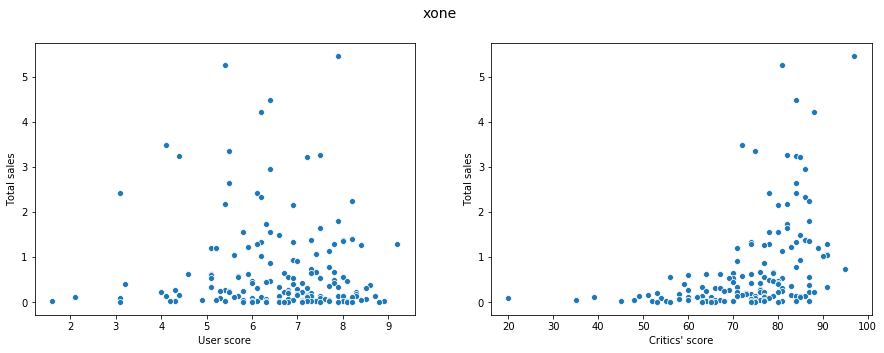

Correlation between critics' scores and sales xone 0.42867694370333226
Correlation between users' scores and sales xone -0.0703839280647581


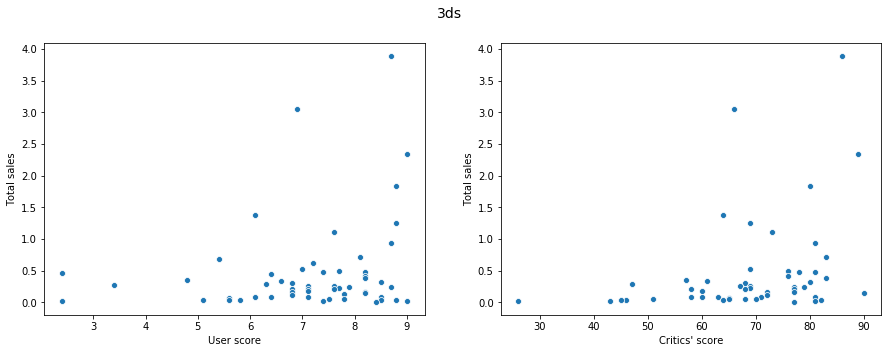

Correlation between critics' scores and sales 3ds 0.314117492869051
Correlation between users' scores and sales 3ds 0.2151932718527028


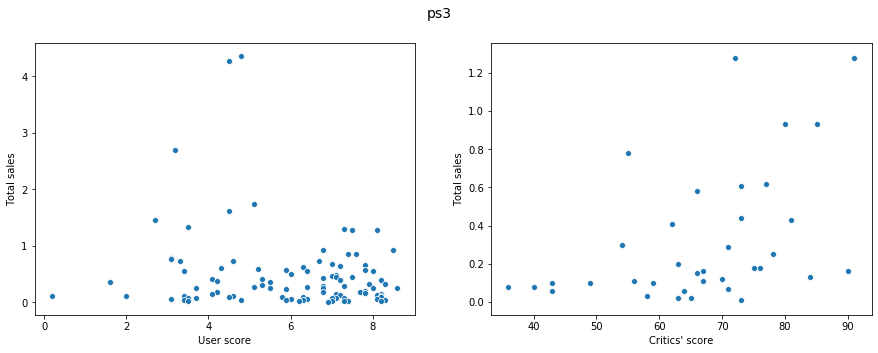

Correlation between critics' scores and sales ps3 0.44657460493190704
Correlation between users' scores and sales ps3 -0.16676141347662118


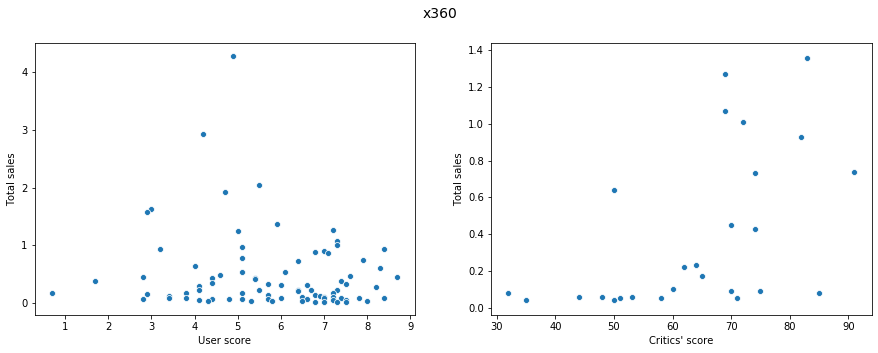

Correlation between critics' scores and sales x360 0.5257228356581523
Correlation between users' scores and sales x360 -0.138444570945665


In [45]:
# plotting a scatterplot and calculating the correlation between user ratings and sales and between critic' ratings and sales for the top-5 platforms
for platform in top5_dict:
    other_platforms(platform)

In [46]:
# calculating variance, standard deviation, mean and median of the top-5 platforms to user ratings in 2014-2016
for platform in top5_dict:
    print('Variance', platform,':', np.var(actual_period[actual_period['platform']==platform]['user_score']))
    print('Standard deviation', platform,':', np.std(actual_period[actual_period['platform']==platform]['user_score']))
    print('Mean',platform,':',  actual_period[actual_period['platform']==platform]['user_score'].mean())
    print('Median',platform,':',  actual_period[actual_period['platform']==platform]['user_score'].median())
    print('\n')

Variance ps4 : 1.9492104364455964
Standard deviation ps4 : 1.396141266650906
Mean ps4 : 6.828099173553719
Median ps4 : 7.1


Variance xone : 1.87954600550964
Standard deviation xone : 1.370965355328004
Mean xone : 6.594545454545453
Median xone : 6.8


Variance 3ds : 2.2194512396694215
Standard deviation 3ds : 1.4897822792842657
Mean 3ds : 7.1381818181818195
Median 3ds : 7.4


Variance ps3 : 3.3993877551020417
Standard deviation ps3 : 1.8437428657765815
Mean ps3 : 6.014285714285714
Median ps3 : 6.550000000000001


Variance x360 : 2.887597619393235
Standard deviation x360 : 1.6992932705666892
Mean x360 : 5.7710843373493965
Median x360 : 6.0




In [47]:
# calculating the variance, standard deviation, mean and median of the top-5 platforms to critics' ratings in 2014-2016
for platform in top5_dict:
    print('Variance', platform,':', np.var(actual_period[actual_period['platform']==platform]['critic_score']))
    print('Standard deviation', platform,':', np.std(actual_period[actual_period['platform']==platform]['critic_score']))
    print('Mean',platform,':',  actual_period[actual_period['platform']==platform]['critic_score'].mean())
    print('Median',platform,':',  actual_period[actual_period['platform']==platform]['critic_score'].median())
    print('\n')

Variance ps4 : 148.5762965336752
Standard deviation ps4 : 12.189187689656567
Mean ps4 : 72.16455696202532
Median ps4 : 73.0


Variance xone : 149.1573777315296
Standard deviation xone : 12.21300035746866
Mean xone : 73.79354838709678
Median xone : 76.0


Variance 3ds : 162.09765474817377
Standard deviation 3ds : 12.731757724217571
Mean 3ds : 68.98039215686275
Median 3ds : 69.0


Variance ps3 : 178.69135802469137
Standard deviation ps3 : 13.367548691689564
Mean ps3 : 66.55555555555556
Median ps3 : 67.0


Variance x360 : 218.042899408284
Standard deviation x360 : 14.766275746046597
Mean x360 : 63.73076923076923
Median x360 : 67.0




- Correlation between critics' scores and PS4, Xone, 3DS, PS3 gaming platforms is moderate. Correlation between critics' scores and the X360 gaming platform is high;
- There is no correlation between users' scores and sales for all platforms;
- The critics' scores has a stronger effect on sales than the users' scores.

### Checking the distribution of sales by genre

Text(0, 0.5, 'Sales')

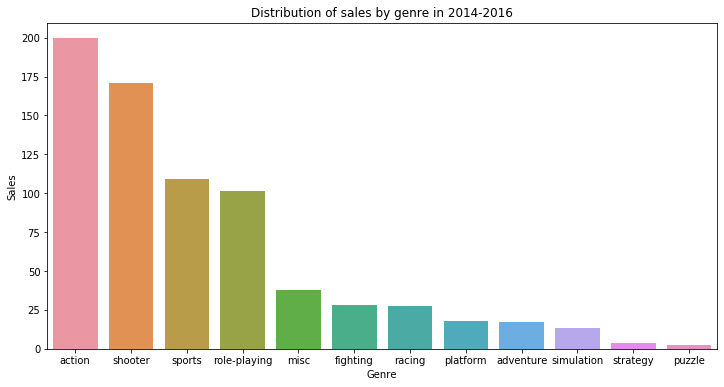

In [48]:
# creating a variable genre_sales and saving the distribution of games by genre in 2014-2016
genre_sales = actual_period.pivot_table(
    index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False)
genre_sales = genre_sales.reset_index().rename_axis(None, axis=1)

# plotting the distribution of sales by genre in 2014-2016
plt.figure(figsize=(12,6))
sns.barplot(data = genre_sales, x = 'genre', y = 'total_sales')
plt.title('Distribution of sales by genre in 2014-2016')
plt.xlabel('Genre')
plt.ylabel('Sales')

The action genre sells best, followed by the shooter and sports genres. Puzzle is the least popular.

The number of total sales does not often indicate that all games in a genre are consistently successful. Rather, we should look for genres where income is consistently high - for this, we will consider average and median sales.

Text(0, 0.5, 'Sales')

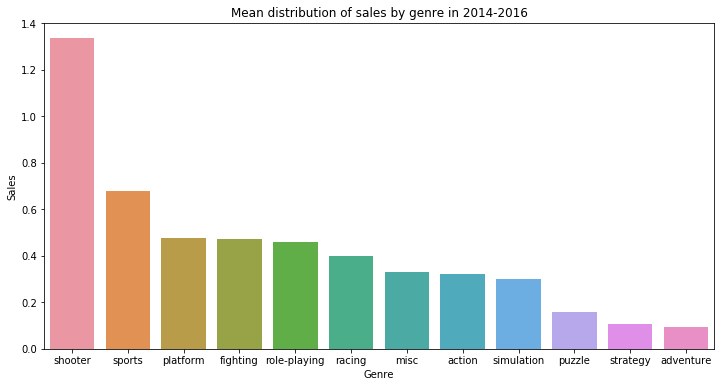

In [49]:
# creating a genre_sales_mean variable and saving the mean distribution of sales by genre in 2014-2016
genre_sales_mean = actual_period.pivot_table(
    index = 'genre', values = 'total_sales', aggfunc = 'mean').sort_values(by='total_sales', ascending = False)
genre_sales_mean = genre_sales_mean.reset_index().rename_axis(None, axis=1)

# plot the distribution of sales by genre in 2014-2016
plt.figure(figsize=(12,6))
sns.barplot(data = genre_sales_mean, x = 'genre', y = 'total_sales')
plt.title('Mean distribution of sales by genre in 2014-2016')
plt.xlabel('Genre')
plt.ylabel('Sales')

The shooter genre sells the best, followed by sports and platform. Adventure is the least popular.

Text(0, 0.5, 'Sales')

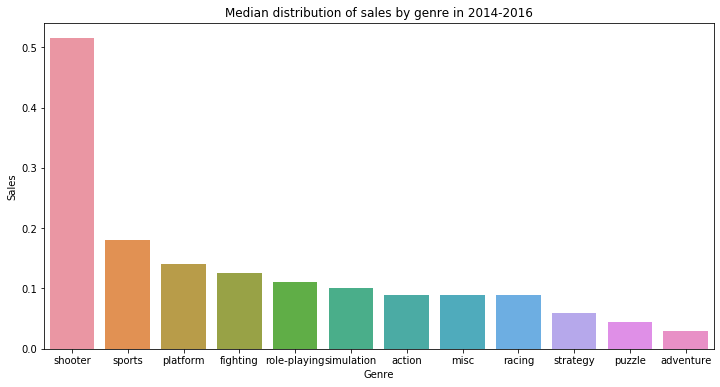

In [50]:
# creating a variable genre_sales_median and saving the median distribution of sales by genre in 2014-2016
genre_sales_median = actual_period.pivot_table(
    index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(by='total_sales', ascending = False)
genre_sales_median = genre_sales_median.reset_index().rename_axis(None, axis=1)

# plotting the distribution of sales by genre in 2014-2016
plt.figure(figsize=(12,6))
sns.barplot(data = genre_sales_median, x = 'genre', y = 'total_sales')
plt.title('Median distribution of sales by genre in 2014-2016')
plt.xlabel('Genre')
plt.ylabel('Sales')

The shooter genre sells the best, followed by sports and platform. Adventure is the least popular.

Based on mean and median sales, it was determined that shooter is the most popular genre, followed by sports and platform genres. Adventure genre is the least popular.

**Conclusion**

- Between the mid-90s and 2008, the number of games released (for game consoles and computers) increased. Since 2008, mobile games have increased and the number of games released has declined;
- The best selling gaming platforms are ps2, x360, ps3, wii, ds, ps. Gaming platforms typically last 10 years and their peak sales fall 5 years after their release.
- Considering how dynamic the industry of gaming platforms is, we took the period of 2014-2016 as the actual period.
- As of 2016, the PS4 remains the most popular platform, despite falling sales since 2015. It is followed by Xone, 3ds, PS3, X360. There is a slowdown in sales across all platforms and the data for 2016 has not yet been finalized.
- The distance between the upper and lower quartile is dominated by PS4, followed by Xone, X360, PS3, 3DS. The distance between the upper and lower whisker is dominated by PS4, followed by Xone, X360, PS3, 3DS. Median higher for Xone, then PS4, X360, PS3, 3DS. Based on the chart, PS4 has more than half of sales, followed by Xone, X360, PS3, and 3DS.
- Correlation between critics' scores and PS4, Xone, 3DS, PS3 gaming platforms is moderate. Correlation between critics' scores and the X360 gaming platform is high. There is no correlation between users' scores and sales for all platforms. The critics' scores has a stronger effect on sales than the users' scores.
- Based on mean and median sales, it was determined that shooter is the most popular genre, followed by sports and platform genres. Adventure genre is the least popular.

## Creating user portraits for each region

In [51]:
# creating a function that determines the top-5 platforms, genres and ratings for 2014-2016 and plots histogram
def top5(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = actual_period.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette("Blues")
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        
plt.show()
sns.set()

**North America user portrait**

  platform  na_sales
0      ps4     98.61
1     xone     81.27
2     x360     28.30
3      3ds     22.64
4      ps3     22.05



          genre  na_sales
0       shooter     79.02
1        action     72.59
2        sports     46.13
3  role-playing     33.47
4          misc     15.05



      rating  na_sales
0          m     96.48
1  no rating     64.72
2          e     50.74
3          t     38.95
4       e10+     33.23





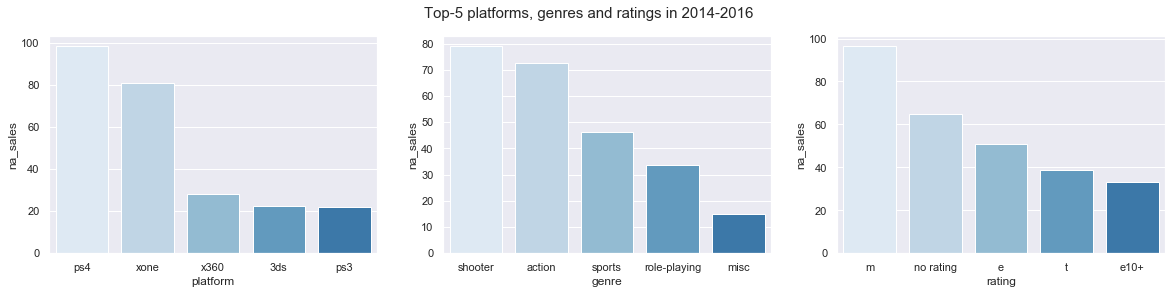

In [52]:
# displaying the top-5 platforms, genres and ratings in 2014-2016 for North America
top5('na_sales','Top-5 platforms, genres and ratings in 2014-2016')

- Most played platforms in North America 2014-2016: PS4, Xone, X360, 3DS, PS3;
- Most popular genres for gaming platforms: shooter, action, sports, role-playing, miscellaneous;
- Most sales in 2014-2016 were for 17+ games, second for unrated games, third for games for everyone, fourth for teens 13— 19 years old, on the fifth game rated for everyone over 10.

**European Union user portrait**

  platform  eu_sales
0      ps4    130.04
1     xone     46.25
2      ps3     25.54
3       pc     18.22
4      3ds     16.12



          genre  eu_sales
0        action     74.93
1       shooter     65.52
2        sports     45.73
3  role-playing     28.17
4        racing     14.13



      rating  eu_sales
0          m     93.69
1  no rating     58.95
2          e     58.06
3          t     34.07
4       e10+     26.16





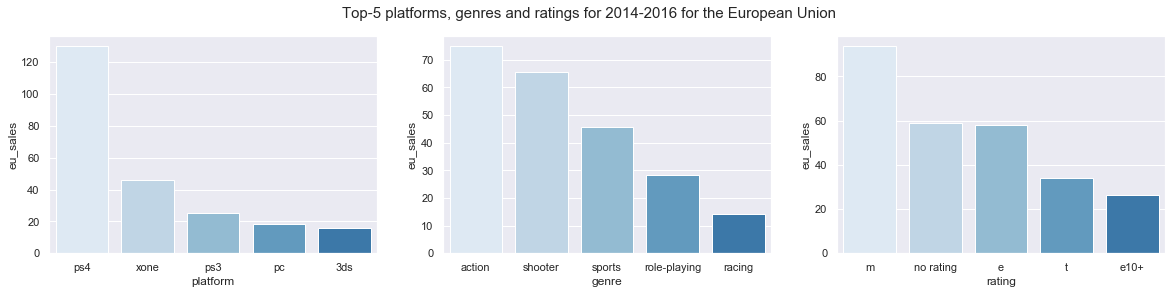

In [53]:
# displaying the top-5 platforms, genres and ratings in 2014-2016 for the European Union
top5('eu_sales','Top-5 platforms, genres and ratings for 2014-2016 for the European Union')

- Most played platforms in the European Union 2014-2016: PS4, Xone, PS3, PC, 3DS;
- Most popular genres for gaming platforms: action, shooter, sports, role-playing, racing;
- Most sales in 2014-2016 were for 17+ games, second for unrated games, third for games for everyone, fourth for teens 13— 19 years old, fifth for games rated for everyone over 10.

**Japan user portrait**

  platform  jp_sales
0      3ds     44.24
1      ps4     15.02
2      psv     14.54
3      ps3     11.22
4     wiiu      7.31



          genre  jp_sales
0  role-playing     31.16
1        action     29.58
2      fighting      6.37
3          misc      5.61
4       shooter      4.87



      rating  jp_sales
0  no rating     56.90
1          t     14.78
2          e      8.94
3          m      8.01
4       e10+      4.46





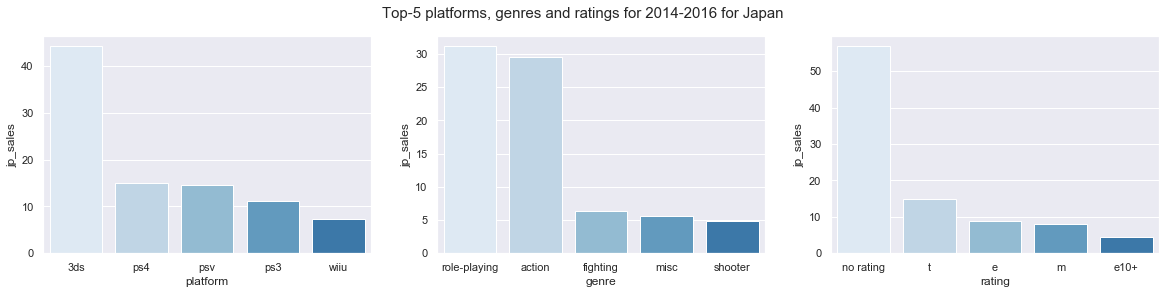

In [54]:
# displaying the top-5 platforms, genres and ratings for 2014-2016 for Japan
top5('jp_sales','Top-5 platforms, genres and ratings for 2014-2016 for Japan')

- Most played platforms in Japan 2014-2016: 3DS, PS4, PSV, PS3, WII;
- Most popular genres for gaming platforms: role-playing, action, fighting, misc, shooter;
- Most sales in 2014-2016 were for unrated games, second for teens 13— 19 years old, third for games for everyone, fourth for 17+ games, fifth for games rated "for everyone over 10.

**Conclusion**

Most played platforms in North America 2014-2016: PS4, Xone, X360, 3DS, PS3. Most popular genres for gaming platforms: shooter, action, sports, role-playing, miscellaneous. Most sales in 2014-2016 were for 17+ games, second for unrated games, third for games for everyone, fourth for teens 13— 19 years old, on the fifth game rated for everyone over 10.

Most played platforms in the European Union 2014-2016: PS4, Xone, PS3, PC, 3DS. Most popular genres for gaming platforms: action, shooter, sports, role-playing, racing. Most sales in 2014-2016 were for 17+ games, second for unrated games, third for games for everyone, fourth for teens 13— 19 years old, fifth for games rated for everyone over 10.

Most played platforms in Japan 2014-2016: 3DS, PS4, PSV, PS3, WII. Most popular genres for gaming platforms: role-playing, action, fighting, misc, shooter. Most sales in 2014-2016 were for unrated games, second for teens 13— 19 years old, third for games for everyone, fourth for 17+ games, fifth for games rated "for everyone over 10.

## Hypotheses testing

Hypotheses I am going to test:
- The mean users' scores of the xbox one and pc platforms are statistically equal;
- The mean users' scores of the genres action and sports are statistically different.

### The mean users' scores of the xbox one and pc platforms are statistically equal

Let's formulate the null and alternative hypotheses:

- H0 - the mean users' scores of the xbox one and pc platforms are statistically equal;
- H1 - the mean users' scores of the xbox one and pc platforms are statistically different.

I will use the scipy.stats.ttest_ind (array1, array2, equal_var) method to test the hypothesis that two populations have an equal mean.

In [55]:
# creating parameters
xone = actual_period[(actual_period['platform']=='xone')]['user_score']
pc = actual_period[(actual_period['platform']=='pc')]['user_score']

In [56]:
# comparing the sample variances using the Levene statistic test (for the equal_var parameter)
stat, p = levene(xone.dropna(), pc.dropna())
p

0.01358684357345301

A small p-significance level indicates that the variances are not equal.

In [57]:
# setting the significance level 
alpha = .05

results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var=False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

p-value: 0.13923712043548309
We do not reject the null hypothesis


P-value greater than the significance level of 5% => the mean users' scores of the xbox one and pc platforms are statistically equal.

### The mean users' scores of the genres action and sports are statistically different

Let's formulate the null and alternative hypotheses:

- H0: the mean users' ratings of the action and sports genres are statistically equal;
- H1: the mean users' ratings of the action and sports genres are statistically different.

I will use the scipy.stats.ttest_ind (array1, array2, equal_var) method to test the hypothesis that two populations have an equal mean.

In [58]:
# creating parameters
genre_action = actual_period[(actual_period['genre']=='action')]['user_score']
genre_sports = actual_period[(actual_period['genre']=='sports')]['user_score']

In [59]:
# comparing the sample variances using the Levene statistic test (for the equal_var parameter)
stat, p = levene(genre_action.dropna(), genre_sports.dropna())
p

4.580194937538438e-06

A small p-significance level indicates that the variances are not equal.

In [60]:
# setting the significance level 
alpha = 0.05

results = st.ttest_ind(genre_action.dropna(), genre_sports.dropna(), equal_var=False)

print('p-value:', results.pvalue)


if (results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print('We do not reject the null hypothesis')

p-value: 9.658176026869598e-15
We reject the null hypothesis


P-value less than the significance level of 5% => the mean users' ratings of the action and sports genres are statistically different.

**Conclusion**

- the mean users' scores of the xbox one and pc platforms are statistically equal;
- the mean users' ratings of the action and sports genres are statistically different.

## Final conclusion

**As a result of performing exploratory data analysis, it was found that:**

- Between the mid-90s and 2008, the number of games released (for game consoles and computers) increased. Since 2008, mobile games have increased and the number of games released has declined;
- The best selling gaming platforms are ps2, x360, ps3, wii, ds, ps. Gaming platforms typically last 10 years and their peak sales fall 5 years after their release.
- Considering how dynamic the industry of gaming platforms is, we took the period of 2014-2016 as the actual period.
- As of 2016, the PS4 remains the most popular platform, despite falling sales since 2015. It is followed by Xone, 3ds, PS3, X360. There is a slowdown in sales across all platforms and the data for 2016 has not yet been finalized.
- The distance between the upper and lower quartile is dominated by PS4, followed by Xone, X360, PS3, 3DS. The distance between the upper and lower whisker is dominated by PS4, followed by Xone, X360, PS3, 3DS. Median higher for Xone, then PS4, X360, PS3, 3DS. Based on the chart, PS4 has more than half of sales, followed by Xone, X360, PS3, and 3DS.
- Correlation between critics' scores and PS4, Xone, 3DS, PS3 gaming platforms is moderate. Correlation between critics' scores and the X360 gaming platform is high. There is no correlation between users' scores and sales for all platforms. The critics' scores has a stronger effect on sales than the users' scores.
- Based on mean and median sales, it was determined that shooter is the most popular genre, followed by sports and platform genres. Adventure genre is the least popular.

**As a result of creating user portraits for each region, it was found that:**

- Most played platforms in North America 2014-2016: PS4, Xone, X360, 3DS, PS3. Most popular genres for gaming platforms: shooter, action, sports, role-playing, miscellaneous. Most sales in 2014-2016 were for 17+ games, second for unrated games, third for games for everyone, fourth for teens 13— 19 years old, on the fifth game rated for everyone over 10.

- Most played platforms in the European Union 2014-2016: PS4, Xone, PS3, PC, 3DS. Most popular genres for gaming platforms: action, shooter, sports, role-playing, racing. Most sales in 2014-2016 were for 17+ games, second for unrated games, third for games for everyone, fourth for teens 13— 19 years old, fifth for games rated for everyone over 10.

- Most played platforms in Japan 2014-2016: 3DS, PS4, PSV, PS3, WII. Most popular genres for gaming platforms: role-playing, action, fighting, misc, shooter. Most sales in 2014-2016 were for unrated games, second for teens 13— 19 years old, third for games for everyone, fourth for 17+ games, fifth for games rated "for everyone over 10.

**As a result of testing hypotheses, it became clear that:**

- the mean users' scores of the xbox one and pc platforms are statistically equal;
- the mean users' ratings of the action and sports genres are statistically different.

**Based on the data analysis performed:**
- it is best to sell games from such platforms as Sony Playstation 4;
- genre must be chosen Shooter;
- the rating must be chosen "from 17 years old".

This will help increase sales significantly.